In [6]:
# Inline images in IPython Notebook - not needed in Python
%matplotlib inline

# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Import the cf and cfplot packages
import cf, cfplot as cfp

In [8]:
# Read in ncas_data/data2.nc (use the read_field function)
f = cf.read('ncas_data/data2.nc')[0]

In [9]:
# Examine the the data to see what fields are in the dataset and check the resolution
print f

Field: air_temperature (ncvar%T)
--------------------------------
Data           : air_temperature(long_name:t(1), long_name:p(1), latitude(160), longitude(320)) K
Axes           : long_name:t(1) = [1981-01-21T00:00:00Z]
               : long_name:p(1) = [1000.0] mbar
               : latitude(160) = [89.1415176392, ..., -89.1415176392] degrees_north
               : longitude(320) = [0.0, ..., 358.875] degrees_east



In [10]:
# Read in ncas_data/data3.nc (use the read_field function)
g = cf.read('ncas_data/data3.nc')[0]

In [11]:
# Examine the data similarly
print g

Field: air_temperature (ncvar%T)
--------------------------------
Data           : air_temperature(long_name:t(1), long_name:p(1), long_name:latitude(256), long_name:longitude(512)) K
Axes           : long_name:t(1) = [1981-01-21T00:00:00Z]
               : long_name:p(1) = [1000.0] mbar
               : long_name:latitude(256) = [89.4629440308, ..., -89.4629440308] degrees_north
               : long_name:longitude(512) = [0.0, ..., 359.296875] degrees_east



In [12]:
# Try regridding the data3.nc field to the grid of data2.nc using the 'conservative' regridding method -
# observe the resulting error
h = g.regrids(f, method='conservative')

ValueError: Source coordinates must have contiguous, non-overlapping bounds for conservative regridding.

In [13]:
# Regrid data3.nc to the grid of data2.nc using the 'bilinear' regridding method
h = g.regrids(f, method='bilinear')

In [14]:
# Examine the result to check it is on the new grid
print h

Field: air_temperature (ncvar%T)
--------------------------------
Data           : air_temperature(long_name:t(1), long_name:p(1), latitude(160), longitude(320)) K
Axes           : long_name:t(1) = [1981-01-21T00:00:00Z]
               : long_name:p(1) = [1000.0] mbar
               : latitude(160) = [89.1415176392, ..., -89.1415176392] degrees_north
               : longitude(320) = [0.0, ..., 358.875] degrees_east



In [15]:
# Find the difference between data2.nc and the regridded field
diff = f - h

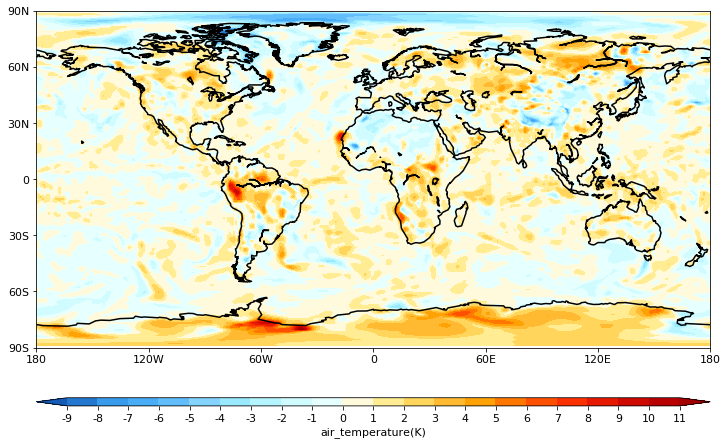

In [16]:
# Make a contour plot of this difference
cfp.con(diff, lines=False)

In [17]:
# Get the latitude and longitude coordinates of data2.nc using the field's coord method
lon1 = f.coord('X')
lat1 = f.coord('Y')

In [18]:
# Create Voronoi bounds for each of the coordinates (use the coordinate's get_bounds method with create=True and
# insert=True)
lon1.get_bounds(create=True, insert=True)
lat1.get_bounds(create=True, insert=True)

<CF Bounds: (160, 2) degrees_north>

In [19]:
# Perform the same operations for the field from data3.nc
lon2 = g.coord('X')
lat2 = g.coord('Y')
lon2.get_bounds(create=True, insert=True)
lat2.get_bounds(create=True, insert=True)

<CF Bounds: (256, 2) degrees_north>

In [20]:
# Regrid data3.nc to the grid of data2.nc using the 'conservative' regridding method
i = g.regrids(f, method='conservative')

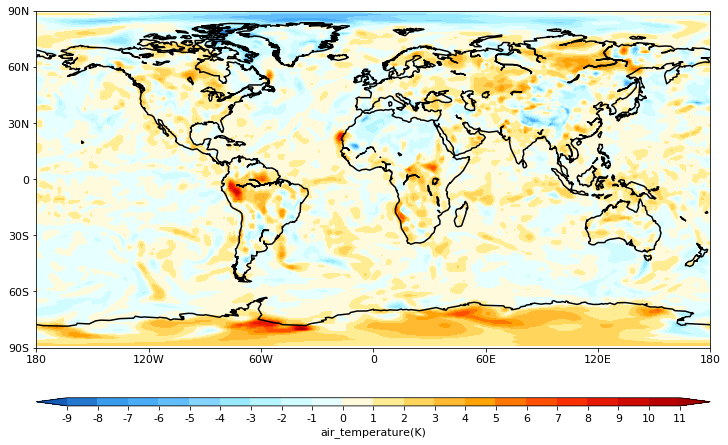

In [21]:
# Plot the difference between data2.nc and the regridded field
cfp.con(f - i, lines=False)

In [22]:
# Try to find the difference between the conservatively regridded field and the bilinearly regridded field -
# observe the error
diff = i - h

ValueError: Can't combine fields: Incompatible 'latitude' coordinate values: [89.1415176392, ..., -89.1415176392] degrees_north, [89.1415176392, ..., -89.1415176392] degrees_north

In [ ]:
# The error occurs because the conservatively regridded field's latitute has bounds, but the bilinearly regridded
# field's does not - delete the conservatively regridded field's latitude and longitude bounds by using del on the
# coordinates' bounds properties
del i.coord('X').bounds
del i.coord('Y').bounds

In [25]:
# Plot the difference between the conservatively regridded field and the bilinearly regridded field
cfp.cscale('scale1')
cfp.levs(min=-1.4, max=1.6, step=0.2)
cfp.con(i - h, lines=False)

ValueError: Can't combine fields: Incompatible 'latitude' coordinate values: [89.1415176392, ..., -89.1415176392] degrees_north, [89.1415176392, ..., -89.1415176392] degrees_north